### Color Spaces

In [ ]:
import cv2 as cv
import  matplotlib.pyplot as plt
img = cv.imread('Images/flowers.jpg')
img = img[:750, :]
# BGR to grayscale
gray  = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#cv.imshow('Gray', gray)
# BGR to HSV
hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
#cv.imshow('HSV', hsv)
# BGR to L*A*B
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
#cv.imshow('L*a*b', lab)
#cv.imshow('Flowers', img)
#plt.imshow(img)
# BGR to RGB
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
cv.imshow('RGB',rgb )
plt.imshow(rgb)
plt.show()
# HSV to BGR
bgr = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
cv.imshow("BGR", bgr)
cv.waitKey(0)
'''In OpenCV the default is BGR format but in other framework it
is RGB, inversion of BGR'''


### Color Channels

In [ ]:
import cv2 as cv
import numpy  as np
img = cv.imread("Images/flowers.jpg")
# Cropping the image
img = img[:750, :]
blank = np.zeros(img.shape[:2], dtype = 'uint8')
cv.imshow('Flowers', img)
# Splitting the three colour channels
b, g, r = cv.split(img)
blue = cv.merge([b, blank, blank])
green = cv.merge([ blank, g,blank])
red = cv.merge([blank, blank, r])

cv.imshow('Blue', blue)
cv.imshow('Green', green)
cv.imshow('Read', red)
#print(img.shape)
#print(b.shape)
#print(g.shape)
#print(r.shape)
merged = cv.merge([r,b,r])
cv.imshow('Merged', merged)
cv.waitKey(0)

### Blurring Techniques

In [ ]:
import cv2 as cv
img = cv.imread("Images/food.jpg")
cv.imshow("Food", img)
# Averaging method
average = cv.blur(img, (7,7))
cv.imshow("Average blur", average)
# Gaussian blur
gaussian = cv.GaussianBlur(img, (7,7), 20)
cv.imshow("Gaussian Blur", gaussian)
# Median Blur
median = cv.medianBlur(img, 3)
cv.imshow("Median blur", median)
# Bilateral Blurring
bilateral =cv.bilateralFilter(img, 5, 15, 15)
cv.imshow("Bileral", bilateral)
cv.waitKey(0)

### Bitwise Operations

In [ ]:
import cv2 as cv
import numpy as np
blank = np.zeros((400,400), dtype = 'uint8')
rectangle = cv.rectangle(blank.copy(), (100,88), (363,350), 255, -1)
circle = cv.circle (blank.copy(), (200,200), 150, 255, -1)
cv.imshow("Retangle", rectangle)
cv.imshow("Circle", circle)
# Bitwise AND
bitwise_and = cv.bitwise_and(rectangle, circle)
cv.imshow("Bitwise AND", bitwise_and)
# bitwise OR
bitwise_or = cv.bitwise_or(rectangle, circle)
cv.imshow("Bitwise OR", bitwise_or)
# bitwise XOR -> Non-intersecting region
bitwise_xor = cv.bitwise_xor(rectangle,circle)
cv.imshow("Bitwise_xor", bitwise_xor)
# bitwise NOT -> Inverse the binary colour
bitwise_not = cv.bitwise_not(rectangle)
cv.imshow("Not Rectangle", bitwise_not)
cv.waitKey(0)

### Masking

In [ ]:
import cv2 as cv
import numpy as np
img = cv.imread("Images/food.jpg")
cv.imshow("Food", img)
blank = np.zeros(img.shape[:2], dtype = 'uint8')
cv.imshow("Blank", blank)
mask = cv.circle(blank, (img.shape[1]//2, img.shape[0]//2), 100, 255, -1)
cv.imshow("Mask", mask)
masked_img = cv.bitwise_and(img, img, mask = mask)
cv.imshow("Mask Image", masked_img)
cv.waitKey(0)

### Computing Histogram

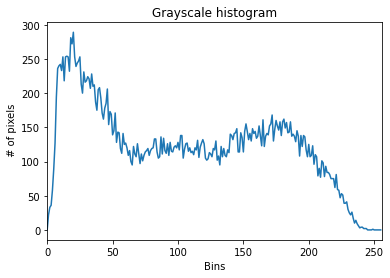

-1

In [9]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
img = cv.imread("Images/flowers.jpg")
img = img[:750, :]
cv.imshow("Flowers", img)
blank = np.zeros(img.shape[:2], dtype = 'uint8')
circle = cv.circle (blank, (img.shape[1] //2, img.shape[0]//2), 100,255, -1)
# compute histogram of gray image
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
mask = cv.bitwise_and(gray, circle)
cv.imshow ("Mask", mask)
#gray = cv.GaussianBlur(gray, (7,7),0)
cv.imshow("Gray", gray)
gray_hist = cv.calcHist([gray], [0], mask, [256], [0, 256] )
plt.figure()
plt.title("Grayscale histogram")
plt.xlabel("Bins")
plt.ylabel(" # of pixels")
plt.plot(gray_hist)
plt.xlim([0,256])
plt.savefig("grayscale.jpg")
plt.show()
cv.waitKey(0)

-1

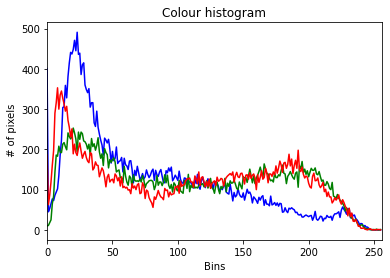

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread("Images/flowers.jpg")
img = img[:750, :]
blank = np.zeros(img.shape[:2], dtype = 'uint8')
mask = cv.circle (blank, (img.shape[1] //2, img.shape[0]//2), 100,255, -1)
masked = cv.bitwise_and(img, img, mask = mask)
cv.imshow("Mask", masked)
# Colour histogram
colors = ('b', 'g', 'r')
plt.figure()
plt.title("Colour histogram")
plt.xlabel("Bins")
plt.ylabel(" # of pixels")
for i, col in enumerate(colors):
    hist = cv.calcHist([img], [i], mask, [256], [0,256])
    cv.calcHist()
    plt.plot(hist, color =  col)
    plt.xlim([0,256])
cv.waitKey(0)

### Thresholding

In [16]:
import cv2 as cv
img = cv.imread("Images/city.jpg")
cv.imshow("City", img)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#cv.imshow("Gray", gray)
# Simple threshhold
threshold, thresh = cv.threshold(gray, 160, 255, cv.THRESH_BINARY)
cv.imshow("Simple Thresholded", thresh)
threshold, thresh_inv = cv.threshold(gray, 160, 255, cv.THRESH_BINARY_INV)
#cv.imshow("Simple Thresholded invert", thresh_inv)
# Adaptive Thresholding
#adaptive_thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 15, 3)
adaptive_thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 15, 3)
cv.imshow("Adaptive thresholding", adaptive_thresh)
cv.waitKey(0)

-1

### Edge Detection

In [26]:
import cv2 as cv
import numpy as np
img = cv.imread("Images/city.jpg")
cv.imshow("City", img)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# Laplacian method
lap = cv.Laplacian(gray, cv.CV_64F)
lap = np.uint8(np.absolute(lap))
cv.imshow("Laplacian", lap)
# Sobel method
sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0)
sobely = cv.Sobel(gray, cv.CV_64F, 0, 1)
cv.imshow("Sobel x", sobelx)
cv.imshow("Sobel y", sobely)
combined_sobel = cv.bitwise_or(sobelx, sobely)
cv.imshow("Combined Sobel", combined_sobel)
# Canny Edge detector
canny = cv.Canny(gray, 150, 175)
cv.imshow("Canny Edge Detection", canny)
cv.waitKey(0)

-1